In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pyvista

No module named 'osgeo'


In [2]:
geo_model = gp.create_data('Canalete',
                           extent = [0, 10000, 0, 1000, -3000, 0],
                           resolution= [100,50,100],
                           path_o="plega60_canalete-ORTt.txt",
                           path_i="plega60_canalete-SUP2t.txt")

Active grids: ['regular']


In [3]:
#geo_model.surface_points

In [4]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,N1N2am,Default series,1,#015482,1
1,N1pacv,Default series,2,#9f0052,2
2,E3N1f,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [5]:
geo_model.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,9258.0146,0,-251.7081,0.390731,1.000024e-12,0.920505,0.01,N1N2am
1,7.0633,0,-896.5633,0.484810,1.000030e-12,0.874620,0.01,N1pacv
2,8.8510,0,-1738.2555,0.469472,1.000029e-12,0.882948,0.01,E3N1f


In [6]:
gp.map_stack_to_surfaces(geo_model,
                         {"Strat_Series": ('E3N1f', 'N1N2am',
                                           'N1pacv')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
0,N1N2am,Strat_Series,1,#015482,1
1,N1pacv,Strat_Series,2,#9f0052,2
2,E3N1f,Strat_Series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [7]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,N1N2am,Strat_Series,1,#015482,1
1,N1pacv,Strat_Series,2,#9f0052,2
2,E3N1f,Strat_Series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [8]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


In [9]:
geo_model.grid

Grid Object. Values: 
array([[   50.,    10., -2985.],
       [   50.,    10., -2955.],
       [   50.,    10., -2925.],
       ...,
       [ 9950.,   990.,   -75.],
       [ 9950.,   990.,   -45.],
       [ 9950.,   990.,   -15.]])

In [10]:
gp.set_interpolator(
    geo_model,
    output=['geology'],
    theano_optimizer='fast compile')

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                          values
range              10488.088482
$C_o$            2619047.619048
drift equations          [3, 3]


In [11]:
gp.get_data(geo_model, 'orientations')

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,9258.0146,0,-251.7081,0.390731,1.000024e-12,0.920505,0.01,N1N2am
1,7.0633,0,-896.5633,0.484810,1.000030e-12,0.874620,0.01,N1pacv
2,8.8510,0,-1738.2555,0.469472,1.000029e-12,0.882948,0.01,E3N1f


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


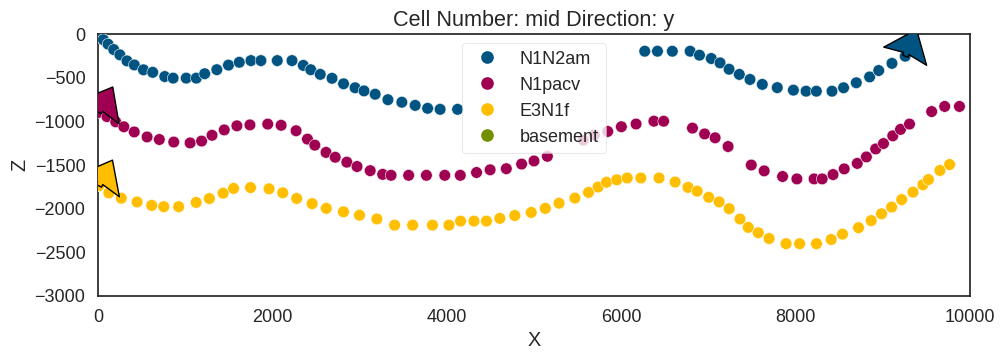

In [12]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [149]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [13]:
gp.get_data(geo_model, 'kriging')

,values
range,10488.088482
$C_o$,2619047.619048
drift equations,"[3, 3]"


In [14]:
sol = gp.compute_model(geo_model)

In [15]:
geo_model.solutions


Lithology ids 
  [4. 4. 4. ... 1. 1. 1.] 

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


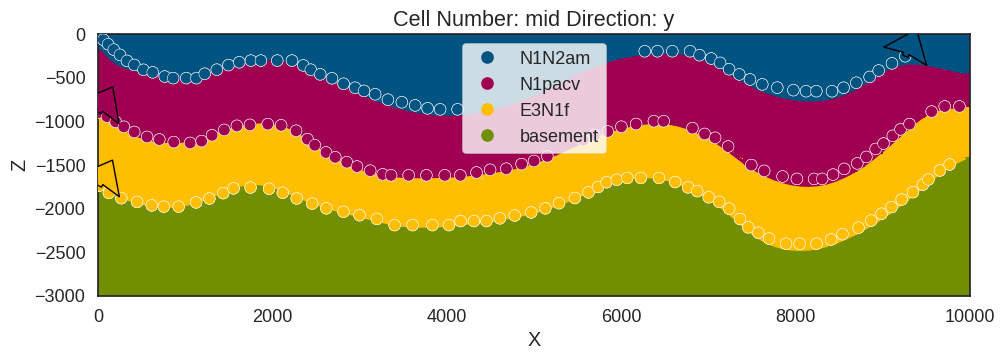

In [16]:
gp.plot_2d(geo_model, show_data=True)
plt.show()

In [156]:
#gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
#plt.show()

In [157]:
#gp.plot_2d(geo_model, series_n=1, show_data=False, show_scalar=True, show_lith=False)
#plt.show()

In [17]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

In [18]:
geo_model.solutions.scalar_field_at_surface_points

array([[0.44061348, 0.42430643, 0.40884949]])

In [162]:
#gp.plot_2d(geo_model, show_block=True, show_lith=False)
#plt.show()

In [161]:
#gp.plot_2d(geo_model, series_n=1, show_block=True, show_lith=False)
#plt.show()

In [19]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,N1N2am,Strat_Series,1,#015482,1
1,N1pacv,Strat_Series,2,#9f0052,2
2,E3N1f,Strat_Series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [20]:
#guardar modelo 3d
import pickle
pickle.dump(geo_model, open("plega60_canalete.p", "wb"))

In [42]:
#load
modelo = pickle.load(open("plega60_canalete.p", "rb"))

In [182]:
#gp.plot_3d(modelo)

# ASIGNACIÓN PROPIEDADES GEOFÍSICAS

In [43]:
#ASIGNAR PROPIEDADES FISICAS
modelo.add_surface_values([2000, 3500, 2500, 2500], ['vp'])  #m/s vp
#modelo.add_surface_values([2.5, 2.67, 2.8, 2.8], ['density'])  #g/cm3 density
modelo.surfaces

,surface,series,order_surfaces,color,id,vp
0,N1N2am,Strat_Series,1,#015482,1,2000
1,N1pacv,Strat_Series,2,#9f0052,2,3500
2,E3N1f,Strat_Series,3,#ffbe00,3,2500
3,basement,Basement,1,#728f02,4,2500


In [44]:
# Set up plotter
#p3d = gp.plot_3d(modelo, notebook=True)
# Plot data points and orientations
#p3d.plot_data()

# Compute the model. Note that a solution is returned. We will use this later
sol = gp.compute_model(modelo)

# Plot the surfaces
#p3d.plot_surfaces()
# Plot the lithological units
#p3d.plot_structured_grid('lith')

In [45]:
sol.values_matrix #asignar propiedades geofísicas al modelo

array([[2500., 2500., 2500., ..., 2000., 2000., 2000.]])

In [46]:
sol.values_matrix.shape

(1, 500000)

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


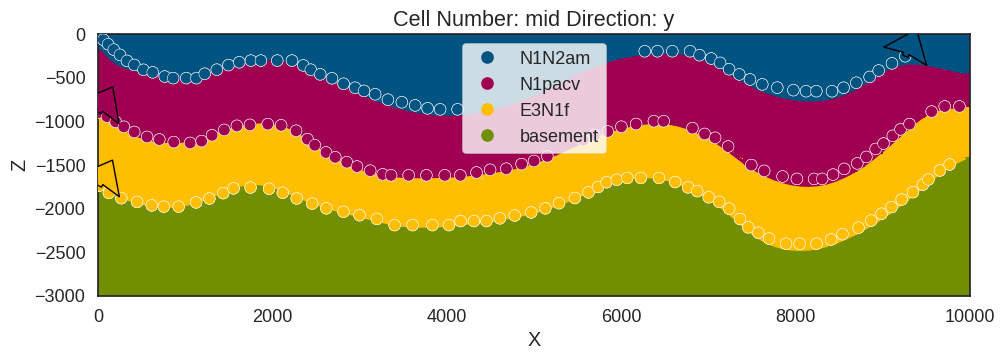

In [47]:
gp.plot_2d(modelo)

In [48]:
# Reshaping our data to the shape required by Devito
import numpy as np
shape = [100,50,100]
reshaped = np.reshape(sol.values_matrix, shape, order='C')
modelo_propiedades = np.flip(reshaped, axis=2).T

In [30]:
modelo_propiedades.shape

(100, 50, 100)

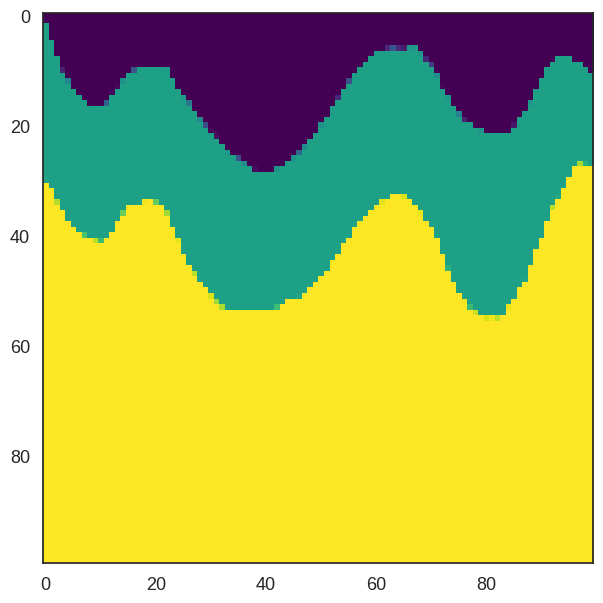

In [31]:
plt.imshow(modelo_propiedades[:,49,:], cmap='viridis')

In [49]:
np.save('vp.npy', modelo_propiedades)

In [50]:
xp =np.load('vp.npy')

In [204]:
#gp.plot_2d(geo_model, notebook=True)

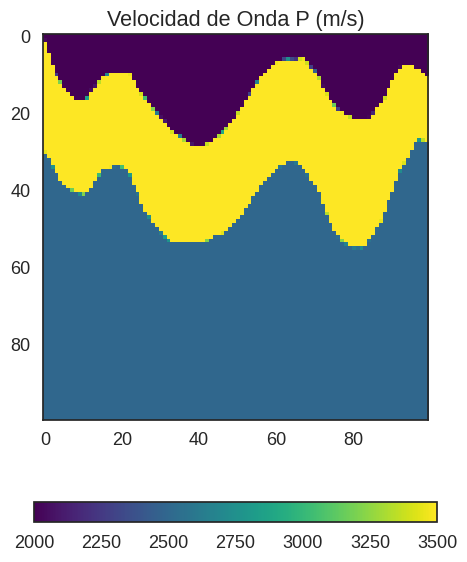

In [51]:
import matplotlib.pyplot as plt

# Take the center slice in the x directio
# Remember that in Devito, indexing convention is [x, y, z] (need to flip for correct imshow display)
plt.imshow(xp[:,49,:], cmap='viridis')
plt.title('Velocidad de Onda P (m/s)')
#plt.title('Densidad (g/cm3)')
plt.colorbar(location="bottom", shrink=0.5)
plt.savefig('vp_ssj.png', dpi=300)
plt.show()

# PROPAGACIÓN DEL ERROR: MÉTODO MONTE CARLO

In [66]:
indices_bool = geo_model.surface_points.df['surface'].isin(['E3N1f','N1N2am','N1pacv'])

In [67]:
indices = geo_model.surface_points.df.index[indices_bool]
indices

Index([ 57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
       ...
       364, 365, 366, 367, 368, 369, 370, 371, 372, 373],
      dtype='int64', length=374)

In [68]:
Z_init = geo_model.surface_points.df.loc[(indices, ['Z', 'surface'])].copy()

In [74]:
Z_init.shape

(374, 2)

In [69]:
df = pd.DataFrame(Z_init)

In [70]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
1,N1pacv,Strat_Series,1,#9f0052,1
0,N1N2am,Strat_Series,2,#015482,2
2,E3N1f,Strat_Series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [71]:
# Filtrar el DataFrame
capa1 = df[df['surface'] == 'E3N1f']['Z']
capa2 = df[df['surface'] == 'N1N2am']['Z']
capa3 = df[df['surface'] == 'N1pacv']['Z']

In [73]:
print(capa1.shape)
print(capa2.shape)
print(capa3.shape)

(130,)
(114,)
(130,)


In [76]:
capa1.head()

122    -911.454886
123    -959.164886
124   -1019.694886
125   -1076.134886
126   -1135.374886
Name: Z, dtype: float64

In [57]:
p3d = gp.plot_3d(geo_model, image=False, show_data=False, plotter_type='basic')

In [58]:
def sample(silent=True):
    Z_var = np.random.normal(0, 30, size=3)
    Z_loc = np.hstack([capa1 + Z_var[0],
                       capa2 + Z_var[1],
                       capa3 + Z_var[2]])
    
    if silent:
        geo_model.modify_surface_points(indices, Z=Z_loc)
        gp.compute_model(geo_model)
    else:
        # Crear un objeto de trazado utilizando gp.plot_2d
        plot_object = gp.plot_2d(geo_model)
        
        # Pasar el objeto de trazado como argumento a modify_surface_points
        geo_model.modify_surface_points(indices, Z=Z_loc, plot_object=plot_object)
    
    return geo_model.solutions.lith_block

In [59]:
lith_blocks = np.array([])
n_iterations = 50  # Número de iteraciones que deseas

for i in range(n_iterations):
    lith_blocks = np.append(lith_blocks, sample())

In [60]:
lith_blocks.shape

(25000000,)

In [61]:
lith_blocks = lith_blocks.reshape(n_iterations, -1)
lith_blocks.shape, lith_blocks

((50, 500000),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

In [62]:
from gempy.bayesian.fields import compute_prob, calculate_ie_masked
prob_block = compute_prob(lith_blocks)

/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/bayesian/fields.py:8: UserWarning: This function is Deprecated, please use the probability function instead
  warnings.warn("This function is Deprecated, please use the probability function instead")


/home/ana/anaconda3/envs/gempyv2/lib/python3.10/site-packages/gempy/plot/plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


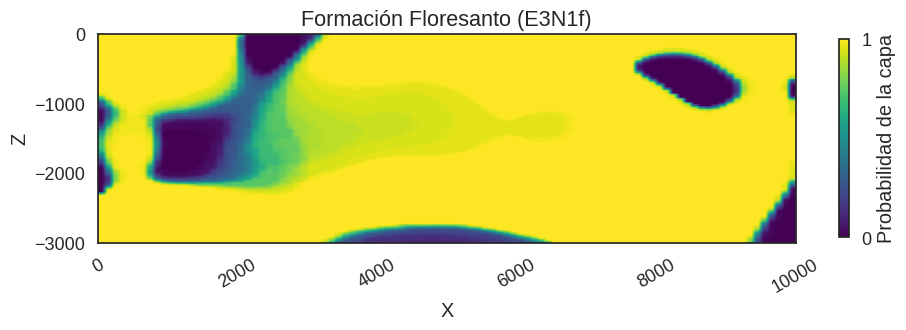

In [63]:
layer = 0
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Floresanto (E3N1f)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_E3N1f_SSJ.png', dpi=300)
plt.show()

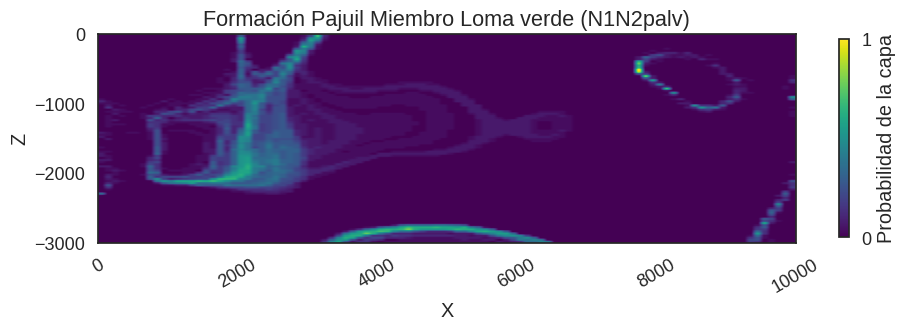

In [64]:
layer = 1
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Pajuil Miembro Loma verde (N1N2palv)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_N1N2palv_SSJ.png', dpi=300)
plt.show()

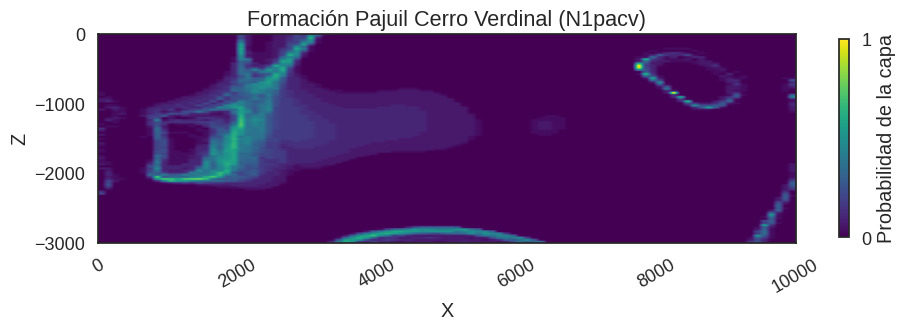

In [65]:
layer = 2
p2dp = gp.plot_2d(geo_model,
                  show_lith=False, show_boundaries=False,
                  show_data=False,
                  regular_grid=prob_block[layer],
                  kwargs_regular_grid={'cmap': 'viridis', 'norm': None})

prob_min = prob_block[layer].min()  # Valor mínimo de probabilidad
prob_max = prob_block[layer].max()  # Valor máximo de probabilidad

# Crear algunos datos de muestra
data = np.random.rand(50, 50)

# Crear un gráfico con imshow y obtener el objeto mappable
mappable = plt.imshow(data, cmap='viridis')

# Agregar un título a la imagen
plt.title('Formación Pajuil Cerro Verdinal (N1pacv)')

# Crear una barra de color usando el objeto mappable
colorbar = plt.colorbar(mappable, shrink=0.3)

# Editar los números de los ticks de la barra de color
colorbar.set_ticks([0, 1])  # Definir las ubicaciones de los ticks
#colorbar.set_ticklabels(['Bajo', 'Medio', 'Alto'])  # Definir las etiquetas de los ticks
colorbar.set_label('Probabilidad de la capa')  # Definir la etiqueta

# Guardar la figura después de mostrarla
plt.savefig('Probabilidad_N1pacv_SSJ.png', dpi=300)
plt.show()